Обучите простую модель предсказания цены акций. Используйте рассмотренные на лекции алгоритмы предсказания рядов (не менее двух,например, модель Хольта-Уинтерса и SARIMA). Можно использовать и более сложные алгоритмы предсказания рядов


1. Найдите данные о цене любого биржевого актива

    Данные должны содержать значение цены актива как минимум за каждый день и длительностю как минимум за год.

    Найти данные можно на kaggle или использовать FAANG датасет из 1-й лабораторной


2. Предобработайте данные

    Временной ряд сложно предсказывать по дням. Сделайте ряд по неделям или месяцам

    Удалите из ряда тренд, если он есть. Используйте другие рассмотренные на лекции приёмы


3. Обучите модель

    Обучите модели на 80% временного ряда

    Предскажите оставшиеся 20% (как минимум 3 точки) ряда с помощью моделей

    Отобразите на графике предсказание моделей и истинные данные


4. Посчитайте метрику

    Метрика должна отражать разницу между предсказанными и истинными данными. Можно выбрать меру MAPE, можно предложить свою

In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from utils import stationarity_test

# Загрузка данных

In [3]:
df = yf.download('SPY')

[*********************100%***********************]  1 of 1 completed


In [4]:
# p = df.asfreq('1d')
# p.fillna(method='ffill', inplace=True)
# p.head(10)

# Обработка данных
1. Разбиение по неделям/месяцам

In [5]:
df_week = df.groupby(pd.Grouper(freq="1W")).mean()
row_week = df_week.Close
df_month = df.groupby(pd.Grouper(freq="1M")).mean()
row_mount = df_month.Close

C:\Users\marse\AppData\Local\Temp\ipykernel_14300\3268077422.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


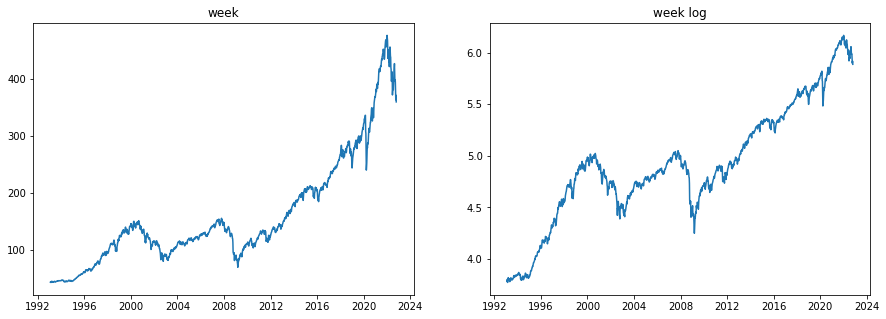

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title("week")
ax1.plot(row_week)
ax2.set_title("week log")
ax2.plot(np.log(row_week))
fig.show()

2. Проверка рядов на стационарность

In [7]:
print(stationarity_test(row_week))
print(stationarity_test(np.log(row_week)))

False
False


3. Удаление тренда дифференцированием

<AxesSubplot:xlabel='Date'>

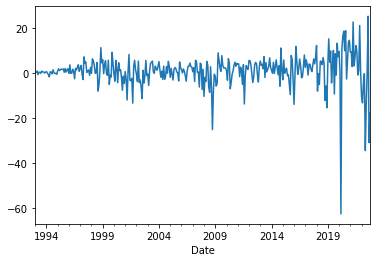

In [8]:
dd = row_mount.diff(periods=1)
dd.plot()

False


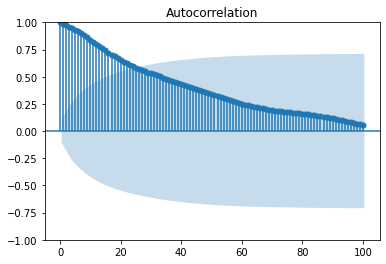

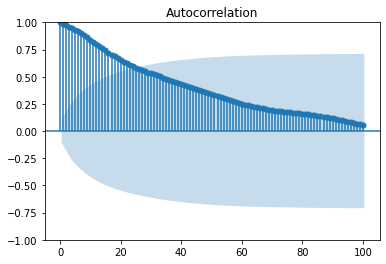

In [16]:
print(stationarity_test(row_mount))
plot_acf(row_mount, lags=100)


True


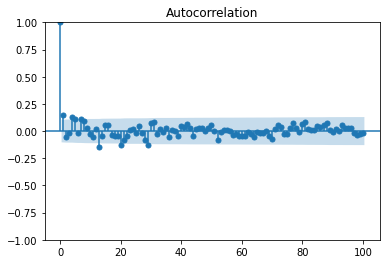

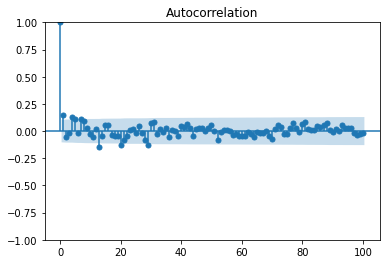

In [17]:
print(stationarity_test(dd.dropna()))
plot_acf(dd.dropna(), lags=100)

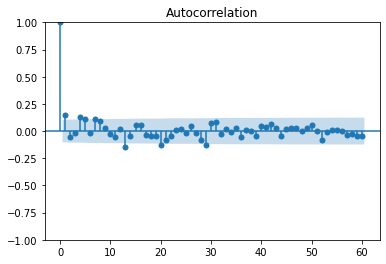

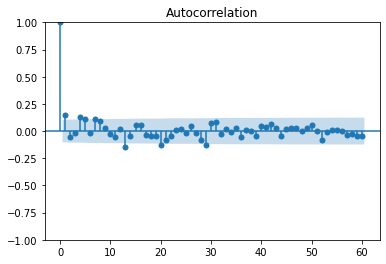